# **1.Problem Tanımı**

*   **Hangi veri seti seçildi?**

Heart Disase veri setini tercih ettim.


---


*   **Problemin amacı nedir? Hedef değişken nedir?**

Kişinin kalp hastalığı taşıyıp taşımadığını tahmin etmeye çalışan bir sınıflandırma problemidir. num column u hedef değişkendir.

---


*   **Bu tahminin pratikteki önemi nedir?**

Kalp hastalıkları hayat açıdan önem taşır. bu yüzden erken teşhis ve riskli hastaların belirlenmesi ve yaş gruplarına göre hastalık dağılımı gibi etkenlerin farkında olmak önemlidir.


In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [56]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/datasets/Pokemon.csv
/content/drive/MyDrive/datasets/UNSW_NB15_training-set.csv
/content/drive/MyDrive/datasets/studentperformance.csv
/content/drive/MyDrive/datasets/heartdisase.csv
/content/drive/MyDrive/datasets/heart_disease_uci.csv


In [57]:
df=pd.read_csv('/content/drive/MyDrive/datasets/heart_disease_uci.csv')
df.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1




---



---


#   **2.Veri Analizi ve Görselleştirme**



---

*  **df.info(), df.describe() çıktıları**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [59]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000




---


*   **Eksik veri kontrolü**
   * kategoriklerdeki eksikleri mod ile dolduracagım, sayısallardakileri de mean ile
   *bunun için preporcess kısmında fonksiyonum var onu kullanacagım
*    boyut
*    tip
*    unique değerler

In [60]:
def check_df(df, head = 5):
  print(f" shape : {df.shape}\n")
  print(f" isnull :\n{df.isnull().sum()}\n")
  print(f" dtypes :\n{df.dtypes}\n")
  print(f" unique :\n{df.nunique()}\n")
  missing_ratio = df.isnull().mean()
  print(missing_ratio[missing_ratio > 0.5])
check_df(df)

 shape : (920, 16)

 isnull :
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

 dtypes :
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

 unique :
id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

ca      0.664130
thal    0.528261
dtype: float64


* **Hedef değişkenin dağılımı**

In [61]:
print("hedef değişken (num) dağılımı:")
print(df['num'].value_counts())

hedef değişken (num) dağılımı:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


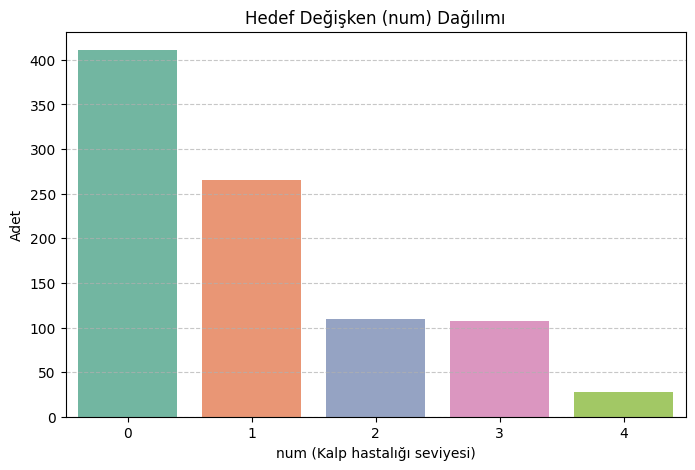

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='num', palette='Set2')
plt.title('Hedef Değişken (num) Dağılımı')
plt.xlabel('num (Kalp hastalığı seviyesi)')
plt.ylabel('Adet')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


---

*  **En az 3 görsel: Korelasyonlar, dağılımlar veya kategorik etkileşimler**

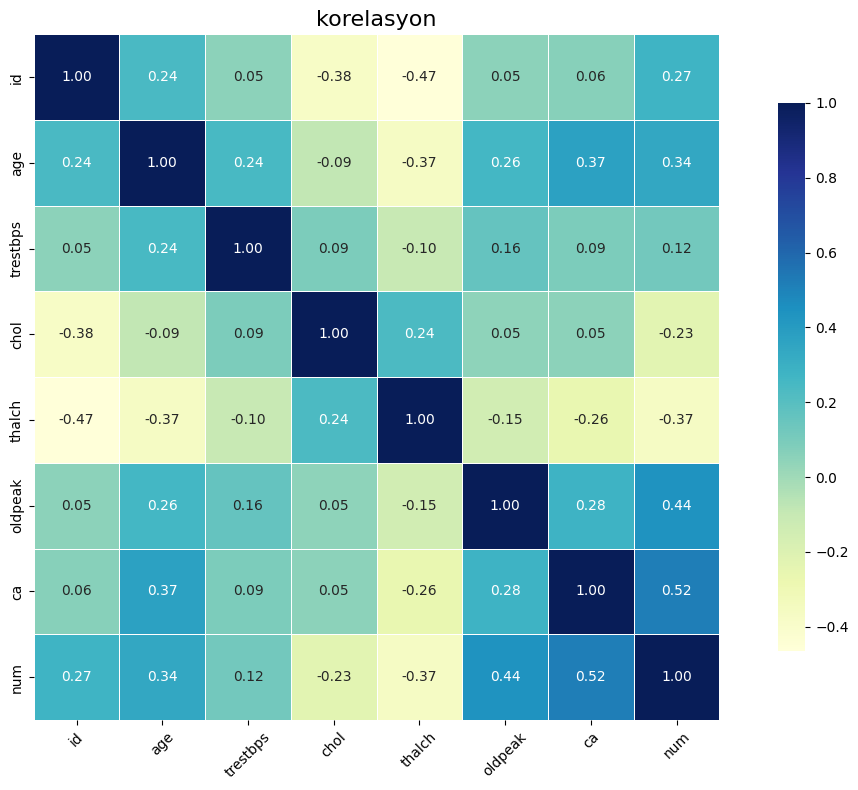

In [63]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)

# Korelasyon ısı haritası
sns.heatmap(
    corr,annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor='white', square=True, cbar_kws={"shrink": 0.8}
)

plt.title("korelasyon", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

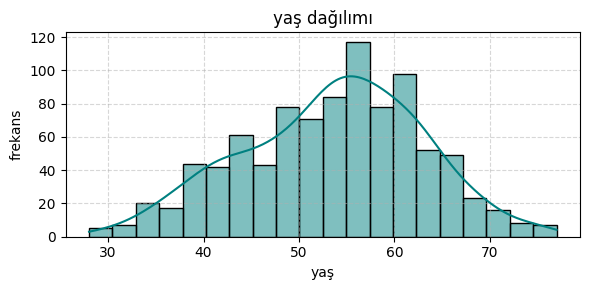

In [64]:
plt.figure(figsize=(6,3))
sns.histplot(df["age"], bins=20, kde=True, color="teal", edgecolor='black')
plt.title("yaş dağılımı")
plt.xlabel("yaş")
plt.ylabel("frekans")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

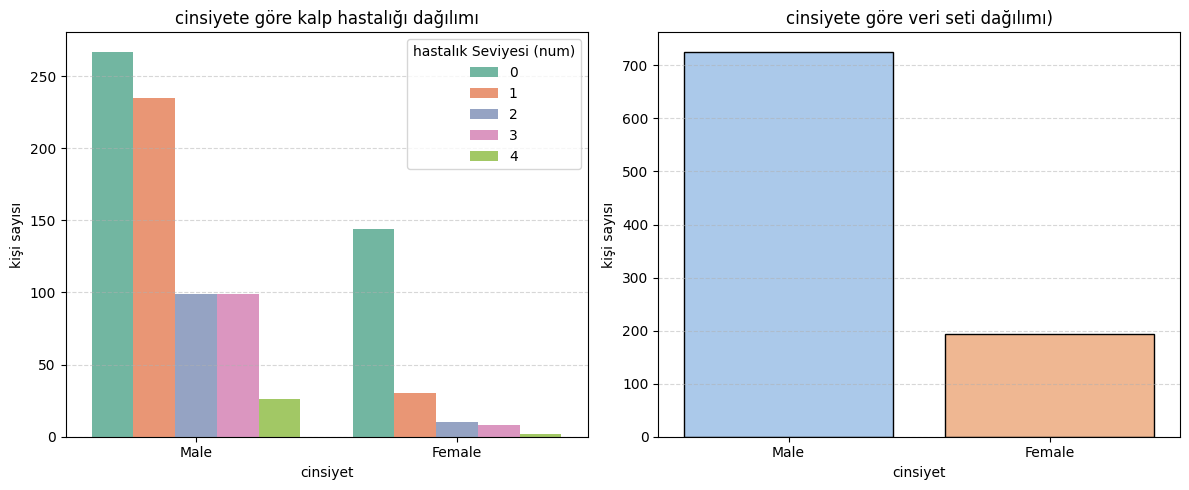

In [65]:
plt.figure(figsize=(12,5))

# 1. subplot: sex vs kalp hastalığı dağılımı (countplot)
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='sex', hue='num', palette='Set2')
plt.title("cinsiyete göre kalp hastalığı dağılımı")
plt.xlabel("cinsiyet")
plt.ylabel("kişi sayısı")
plt.legend(title='hastalık Seviyesi (num)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 2. subplot: sex vs yaş dağılımı (boxplot)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='sex', palette='pastel', edgecolor='black')
plt.title("cinsiyete göre veri seti dağılımı)")
plt.xlabel("cinsiyet")
plt.ylabel("kişi sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

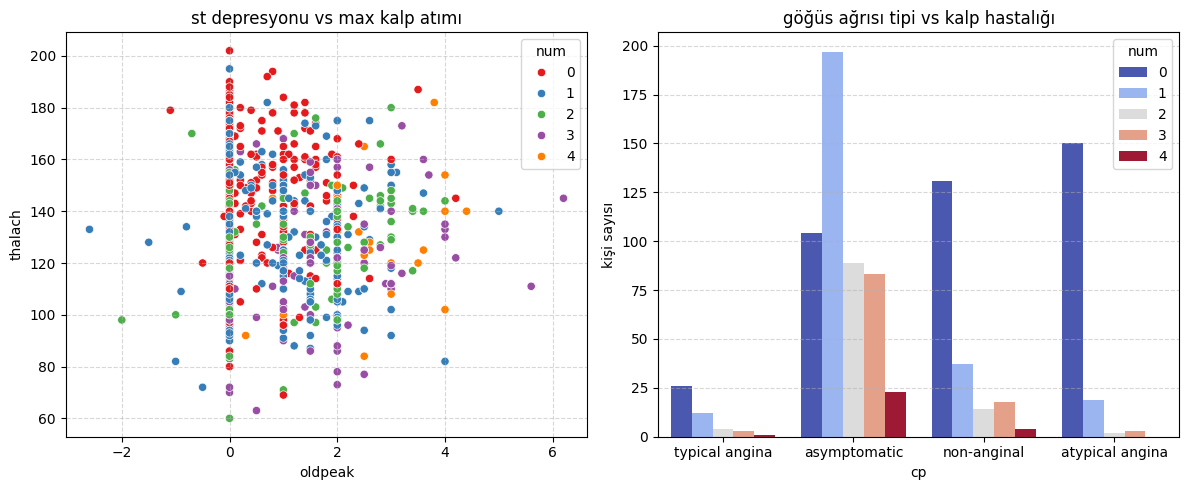

In [66]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='oldpeak', y='thalch', hue='num', palette='Set1')
plt.title("st depresyonu vs max kalp atımı")
plt.xlabel("oldpeak")
plt.ylabel("thalach")
plt.grid(True, linestyle='--', alpha=0.5)


plt.subplot(1, 2, 2)
sns.countplot(data=df, x='cp', hue='num', palette='coolwarm')
plt.title("göğüs ağrısı tipi vs kalp hastalığı")
plt.xlabel("cp")
plt.ylabel("kişi sayısı")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

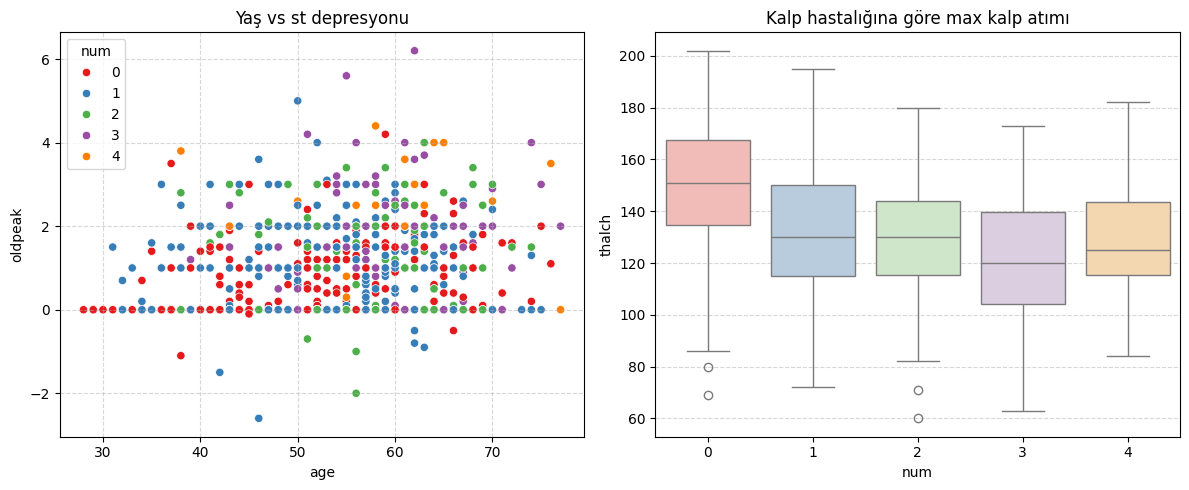

In [67]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='oldpeak', hue='num', palette='Set1')
plt.title("Yaş vs st depresyonu")
plt.xlabel("age")
plt.ylabel("oldpeak")
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='num', y='thalch', palette='Pastel1')
plt.title("Kalp hastalığına göre max kalp atımı")
plt.xlabel("num")
plt.ylabel("thalch")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



---


#   **3. Veri Ön İşleme**


* **veri tipi analizi yapan fonksiyon.**
* bu veri setinde cat_th parametresini 3 olarak almaya karar verdim. aksi durumda, one hot encoding in doğası gereği overfitting ile karşılaşıyordum. yani column sayısı çok artıyordu. daha büyük veri setlerinde cat_th paraemtresi bu genelde 10 olarak tercih ediliyor diye düşünüyorum
* num_but_cat sutunların dönüşümü sayısal olarak hesaba akatılmamaları gerekiyor
* ancak çok fazla kategori varsa sütun sayısı artıyor  bu da modelin aşırı karmaşıklaşmasına overfittinge yol açabiliyor
* ayrıca bazı modeller random forest, XGBoost, CatBoost gibi doğrudan kategorik veriyi da destekliyor böyle modellerde dummy kodlama gerekmez

In [68]:
def grab_col_names(df, cat_th=10):
  num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtype != "O"]
  cat_cols = [col for col in df.columns if df[col].dtype == 'O']
  cat_cols += num_but_cat

  num_cols = [col for col in df.columns if col not in cat_cols]
  return cat_cols, num_cols
cat_cols, num_cols = grab_col_names(df, 3)
print(f'cat_cols: {len(cat_cols)} \n null değer var mı :\n {df[cat_cols].isnull().sum()}')
print(f'num_cols: {len(num_cols)} \n null değer var mı :\n {df[num_cols].isnull().sum()}')

cat_cols: 8 
 null değer var mı :
 sex          0
dataset      0
cp           0
fbs         90
restecg      2
exang       55
slope      309
thal       486
dtype: int64
num_cols: 8 
 null değer var mı :
 id            0
age           0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
num           0
dtype: int64




---

*   **Gerekli encoding işlemleri (LabelEncoder, OneHotEncoder)**
*    **null değerleri doldurma işlemi için**
*   preprocessing(df) fonksiyonunu encode işlemleri için kullanıyorum
*   ben nunique sayısı 3 e kadar olanları grab_col_names(df,3) fonksiyonu ile çağırarak dönen cat_cols lara one hot encoding işlemi uyguluyorum.
* data leakege açısından ilk satırı drop_firsti=True veriyorum


In [69]:
def preprocessing(df):
  cat_cols, num_cols = grab_col_names(df, 3)

  if 'num' in cat_cols:
    cat_cols.remove('num')

  if 'num' in num_cols:
    num_cols.remove('num')

  for col in cat_cols:
    if df[col].isnull().sum() > 0:
      mode_val = df[col].mode()[0]
      df[col].fillna(mode_val, inplace=True)
  for col in num_cols:
    if df[col].isnull().sum() > 0:
      mean_val = df[col].mean()
      df[col].fillna(mean_val, inplace=True)


  df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

  return df,cat_cols, num_cols
df, cat_cols, num_cols = preprocessing(df)
print(f'eksik doldurma ve encode sonrası sutunlar\n {df.columns}')

eksik doldurma ve encode sonrası sutunlar
 Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num',
       'sex_Male', 'dataset_Hungary', 'dataset_Switzerland',
       'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'fbs_True', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_True', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


* **Sayısal veriler için gerekirse StandardScaler / MinMaxScaler**   
    *    sayısal verilerdeki çarpıklığı incelemek için grafikler oluşturdum
    *  aykırı değerler ve silinmesi gereken id gibi sutunlar oldugu görülüyor

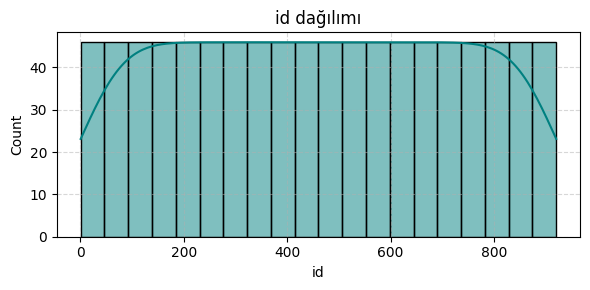

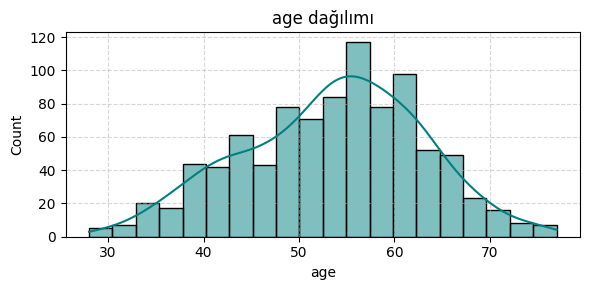

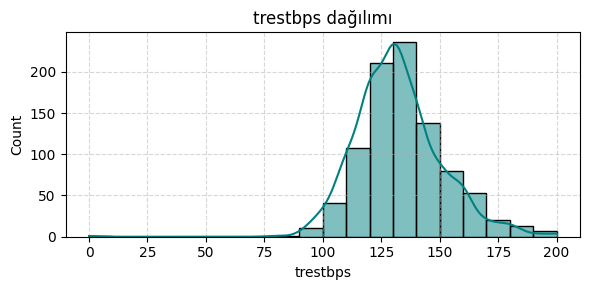

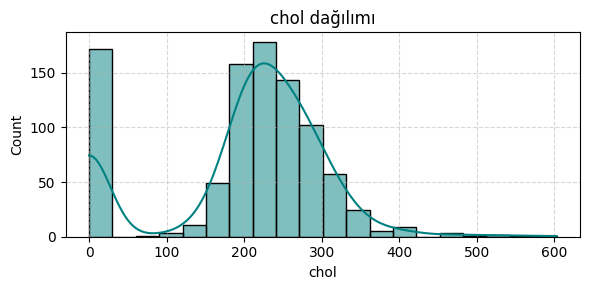

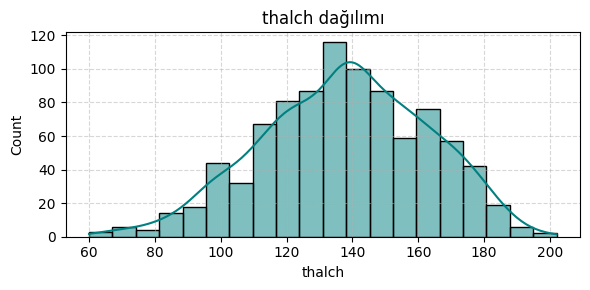

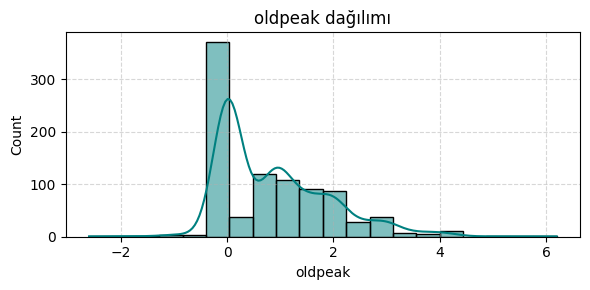

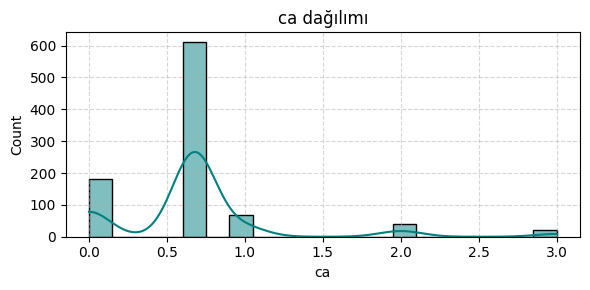

In [70]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, bins=20, kde=True, color="teal", edgecolor='black')
    plt.title(f"{col} dağılımı")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

* skew ile çarpıklığı sayısal olark da gördük.
   * 1den büyük ve -1 den küçüklerde minmax scaler
   * diğerlerinde standart scaler uygulacagım
   * **ama data leakage olmaması için önce traintest split ayıracağım**

In [71]:
skew_vals = df[num_cols].skew().sort_values(ascending=False)
print(skew_vals)

ca          2.005385
oldpeak     1.078270
trestbps    0.220498
id          0.000000
age        -0.195994
thalch     -0.217704
chol       -0.624062
dtype: float64


* **Eğitim/test ayrımı (train_test_split, 70-30 ya da 80-20)**

In [72]:
from sklearn.model_selection import train_test_split
df.drop(columns=["id"])
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

* **Sayısal veriler için gerekirse StandardScaler / MinMaxScaler**

In [73]:
  #data leakege olmaması için train_test_split yaptıktan sonra
  #yalnızca eğitim verisine fit_transform,  test verisine transform uygulayacağım

from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_cols = ['age', 'thalch', 'trestbps', 'chol']
minmax_cols = ['ca', 'oldpeak']

scaler_std = StandardScaler()
X_train[standard_cols] = scaler_std.fit_transform(X_train[standard_cols])
X_test[standard_cols] = scaler_std.transform(X_test[standard_cols])

scaler_mm = MinMaxScaler()
X_train[minmax_cols] = scaler_mm.fit_transform(X_train[minmax_cols])
X_test[minmax_cols] = scaler_mm.transform(X_test[minmax_cols])


# **4B. Eğer Heart Disease UCI seçildiyse (Sınıflandırma):**

*   **Hedef değişken: target (1 = kalp hastalığı var, 0 = yok)**


```
y = df['num']
y.unique()

```


```
array([0, 2, 1, 3, 4])
```
* **heart disase uci ve heart disase birbirinden farklı datasetleridir.**
* **uci de hedef değiken num iken, heart disase da hedef değişken target olara geçmektedir.**

In [74]:
y.unique()

array([0, 2, 1, 3, 4])

hedef değişkenin ikili yapmak için 0 ı 0 bırakıp, 0 olmayanları 1 alacağım

In [75]:
df.drop(columns=["id"])

X = df.drop('num', axis=1)
y = df['num']

y = y.apply(lambda x: 0 if x == 0 else 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [76]:
y.unique()

array([0, 1])

In [77]:
print(type(y))
print(y.unique())
print(y.dtype)


<class 'pandas.core.series.Series'>
[0 1]
int64


*  **En az iki sınıflandırma modeli kurun:**
*   **Logistic Regression**
*  **Random Forest veya KNN/SVM gibi alternatif model**

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
}

* **Başarı metrikleri: Accuracy, Precision, Recall, F1-Score**
* **Confusion Matrix**
   * eğitim doğruluğu ve test doğruluğu arasında bir çıkarım yaparak overfitting riskini değerlendirmeye çalıştım



Logistic Regression Sonuçları:
Eğitim Doğruluk: 0.8478
Test Doğruluk: 0.8478
✅ Overfitting görünmüyor. Eğitim ve test doğruluğu benzer.

Test Seti Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       123
           1       0.84      0.89      0.87       153

    accuracy                           0.85       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



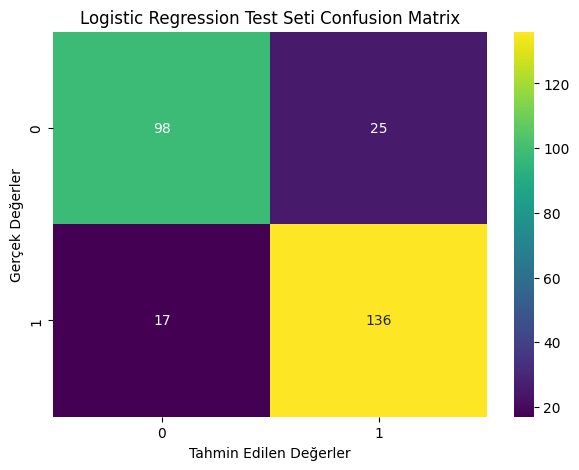



Random Forest Sonuçları:
Eğitim Doğruluk: 1.0000
Test Doğruluk: 0.8804
⚠️ Overfitting ihtimali var! Eğitim doğruluğu testten çok daha yüksek.

Test Seti Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       123
           1       0.88      0.92      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



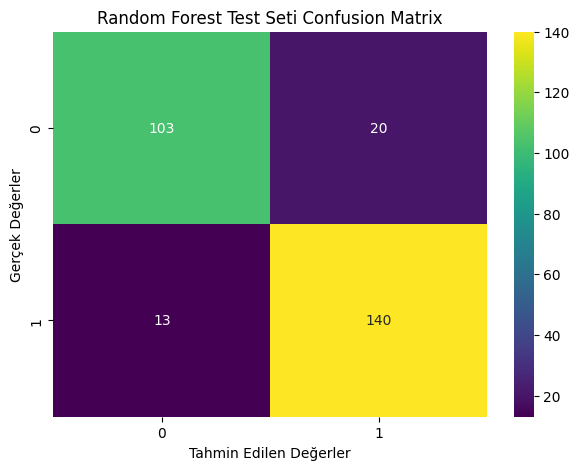



SVM Sonuçları:
Eğitim Doğruluk: 0.7562
Test Doğruluk: 0.7355
✅ Overfitting görünmüyor. Eğitim ve test doğruluğu benzer.

Test Seti Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       123
           1       0.85      0.63      0.73       153

    accuracy                           0.74       276
   macro avg       0.75      0.75      0.74       276
weighted avg       0.76      0.74      0.73       276



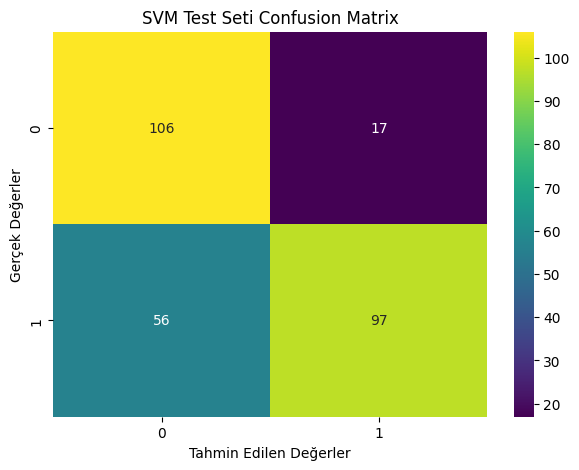



KNN Sonuçları:
Eğitim Doğruluk: 0.8432
Test Doğruluk: 0.8116
✅ Overfitting görünmüyor. Eğitim ve test doğruluğu benzer.

Test Seti Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       123
           1       0.82      0.85      0.83       153

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276



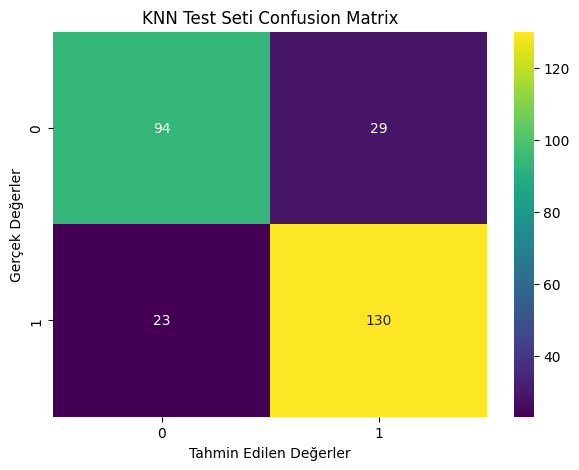

In [80]:
results = {}
for name, model in models.items():
    # Modeli eğit
    model.fit(X_train, y_train)

    # Tahminler
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Sonuçları kaydet
    results[name] = {
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'classification_report': classification_report(y_test, y_pred_test),
        'confusion_matrix': confusion_matrix(y_test, y_pred_test)
    }

    print(f"\n\n{name} Sonuçları:")
    print(f"Eğitim Doğruluk: {results[name]['train_accuracy']:.4f}")
    print(f"Test Doğruluk: {results[name]['test_accuracy']:.4f}")

    if results[name]['train_accuracy'] - results[name]['test_accuracy'] > 0.1:
        print("⚠️ Overfitting ihtimali var! Eğitim doğruluğu testten çok daha yüksek.")
    else:
        print("✅ Overfitting görünmüyor. Eğitim ve test doğruluğu benzer.")

    print("\nTest Seti Sınıflandırma Raporu:")
    print(results[name]['classification_report'])

    # Confusion matrix görselleştir
    plt.figure(figsize=(7,5))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='viridis')
    plt.title(f'{name} Test Seti Confusion Matrix')
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()


*  **ROC-AUC eğrisi**
   * ROC eğrisi ne kadar sol üst köşeye yakınsa, model o kadar iyidir.
   * AUC değeri, modelin pozitif ve negatif sınıfları ayırma başarısını özetler.




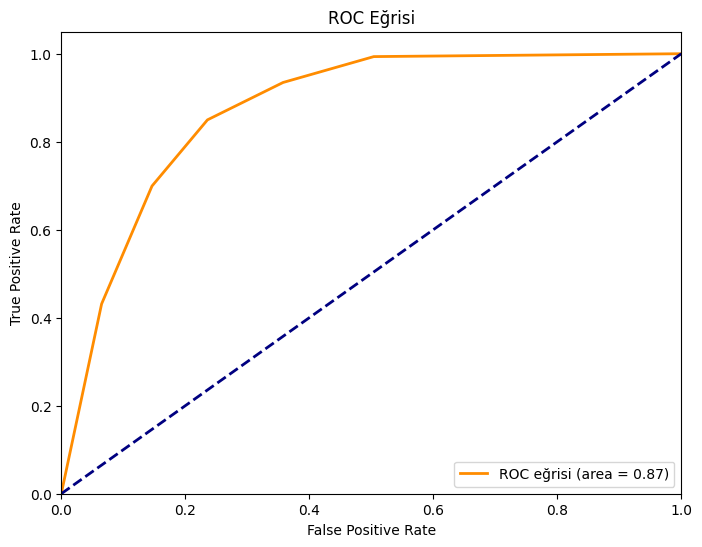

In [81]:
from sklearn.metrics import roc_curve, auc

# modelin test seti için olasılık tahminleri (pozitif sınıfa ait)
y_prob = model.predict_proba(X_test)[:, 1]  # sadece pozitif sınıf olasılıkları

# ROC eğrisi için FPR, TPR ve eşik değerleri
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC skorunu hesapla
roc_auc = auc(fpr, tpr)

# Grafik çizimi
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

---
# **Ekstra**
*  **GridSearchCV ile hiperparametre optimizasyonu**

  * 1.hücrede en iyi modeli test accuracy ini ölçerek bulmaya çalıştım
  * 2.hücrede hiperparametrelerin gridlerini tanımladım


In [82]:
# En iyi modeli bulma
best_model_name = max(results.items(), key=lambda x: x[1]['test_accuracy'])[0]
#best_model_name = 'Logistic Regression'
print(f"\nEn iyi model: {best_model_name}")


En iyi model: Random Forest


In [83]:
# Hiper parametre grid'lerini tanımlama
param_grids = {
    'Logistic Regression': {
      'logreg__C': [0.01, 0.1, 1, 10],
      'logreg__penalty': ['l2'],
      'logreg__solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [80, 100],
        'max_depth': [10,15, None],
        'min_samples_split': [2,4],
        'min_samples_leaf': [1, 2]
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['rbf', 'linear'],
        'svm__gamma': ['scale', 0.1, 1]
    },
    'KNN': {
        'knn__n_neighbors': [3, 5, 7],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean']
    },

}

In [84]:
# GridSearchCV için model ve parametre grid'ini seçme
model = models[best_model_name]
param_grid = param_grids[best_model_name]

In [85]:
# GridSearchCV ile hiper parametre optimizasyonu
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5, #5-fold yeterli
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    return_train_score=True, #Overfitting kontrolü için
)

In [86]:
# GridSearchCV'yi çalıştırma
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve skoru yazdırma
print("\nEn iyi parametreler:")
print(grid_search.best_params_)
print(f"\nEn iyi cross-validation skoru: {grid_search.best_score_:.4f}")

# En iyi model ile test seti üzerinde tahmin
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits

En iyi parametreler:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

En iyi cross-validation skoru: 0.8789


In [87]:
# Test seti sonuçlarını yazdırma
print("\nTest seti sonuçları:")
print(f"Doğruluk: {accuracy_score(y_test, y_pred):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Test seti sonuçları:
Doğruluk: 0.8804

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       123
           1       0.88      0.92      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



*  **Feature Importance görselleştirmesi (özellikle Random Forest ile)**







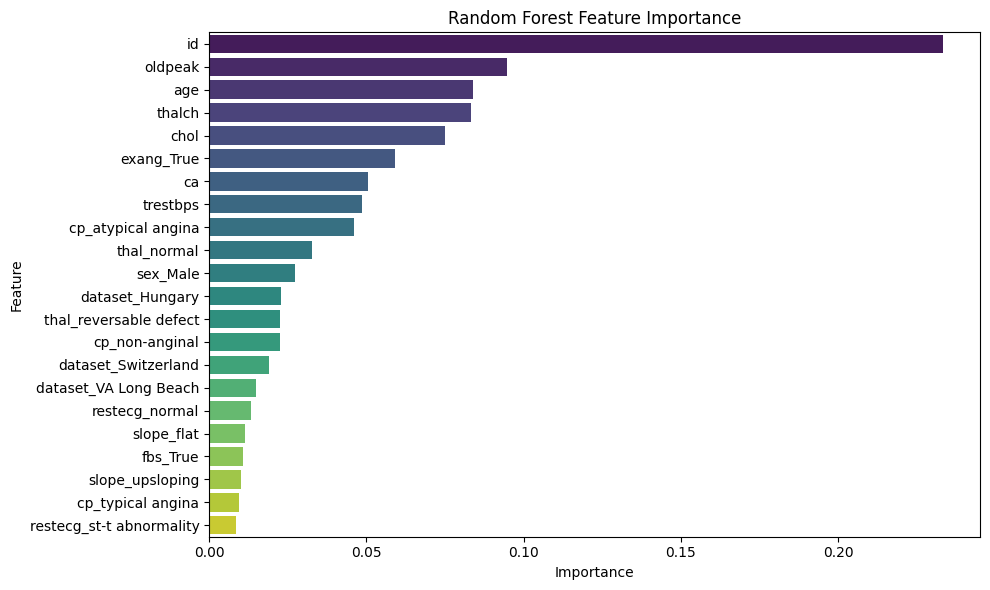

In [88]:
# model: eğitilmiş RandomForestClassifier (örneğin model)
# X_train: eğitim veri setinin özellikleri (dataframe)

importances = model.feature_importances_
features = X_train.columns

# Özellikleri ve önem değerlerini dataframe yapalım
feat_importance = pd.DataFrame({'feature': features, 'importance': importances})

# Önem sırasına göre sırala
feat_importance = feat_importance.sort_values(by='importance', ascending=False)

# Görselleştir
plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

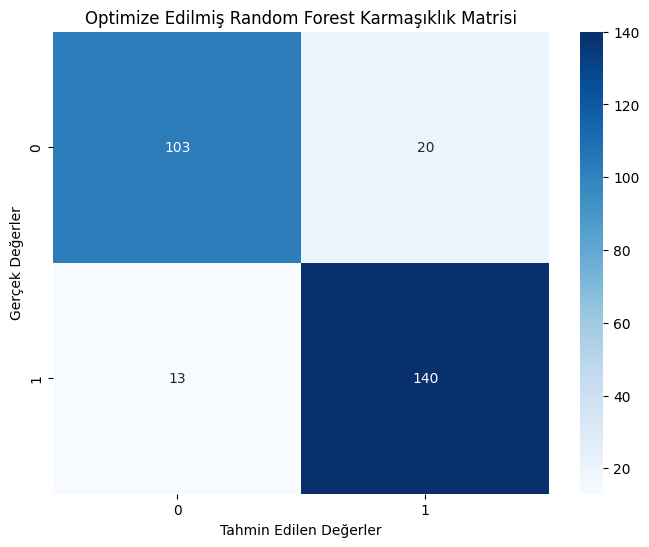

In [93]:
# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Optimize Edilmiş {best_model_name} Karmaşıklık Matrisi')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

#**5. Model Karşılaştırması**
*  Hangi model daha iyi performans verdi?
   * her ne kadar skor karşılaşma grafiğinde random forest en iyi olarak görünse de bu accuracy üzerinden  oldugu için farklı yorumlar da yapabiliriz
   * logistic regresyon ve knn daha dengeli ve güvenilir bir performans sunuyor
*  Hangi metrik üzerinde öne çıktı?
    * bizim hastalık tespiti gibi bir görevde odaklanmamız gereken f1 score-recall.
*  Aşırı öğrenme veya yetersiz öğrenme gözlendi mi?
   * random forest da test accuracy nin train accuracy den düşük olduğunu gözlemledim. bu da overfitting riskini gösteriyor.
   * svc nin kötü olmasa da çok da iyi olmayan bir sonuç verdiği gözlemledim
   * en iyi sonuçlar logistic regresyon ve knn de.

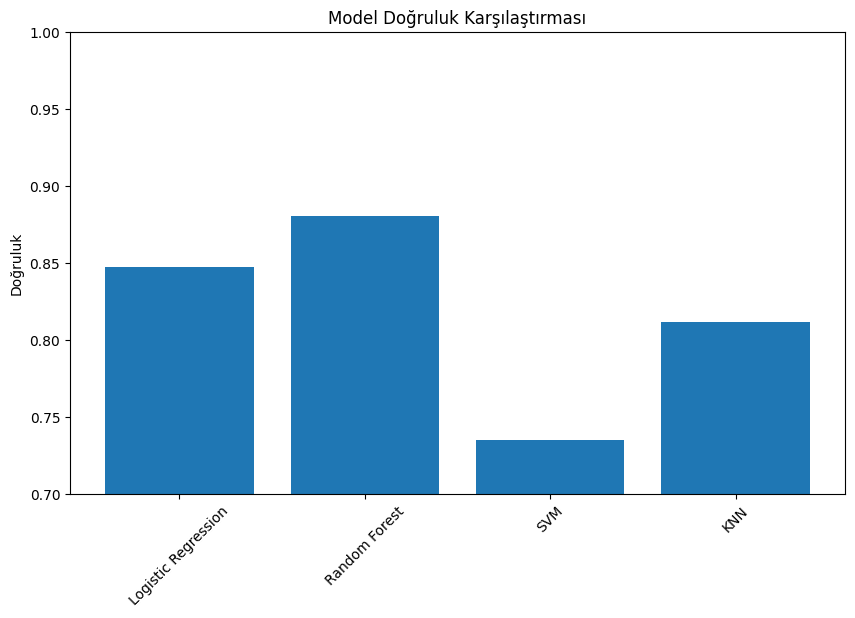

In [94]:
# Tüm modellerin doğruluk skorlarını karşılaştırma
accuracies = {name: result['test_accuracy'] for name, result in results.items()}
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Doğruluk Karşılaştırması')
plt.xticks(rotation=45)
plt.ylabel('Doğruluk')
plt.ylim(0.7, 1.0)
plt.show()

# **6. Sonuç ve Yorumlar**

**Modelin pratik kullanımı hakkında değerlendirme**
   * Açıklanabilirlik gerekiyorsa Logistic Regression kullanımı daha mantıklı
   *f1 score u dengeli,
   * özellikle recall(fn) açısından yüksek : 0.89
   
   * **ilk tercih bence logistic regresyon olmalı**

**Daha iyi sonuçlar için neler yapılabilir?**
   * cross validaiton ve hiperparamtre ayarlaması daha dikkatli yapılabilir
   * mesela best model olarak accuracy de random forest görünüyordu ama overfitting ihtimali yüksekti
   * bu yüzden gridsearcv yaptım
   * catboost, lightgbm gibi modeller de kullanılabilir ama veri çok büyük olmadığı için yapmadım. hem de modelin karmaşıklaşması overfitting riskini doğruyuor
   * veri çok linear değilmiş ki svc çok başarılı olmamış
   *knn de de başarı gayet iyi görünüyor overfitting ihtimali de deüşük


***  Veri setiyle ilgili gözlemler**

| Sütun Adı  | Türkçe Adı           | Açıklama                                                      |
|------------|----------------------|---------------------------------------------------------------|
| id         | Kimlik               | Her hasta için benzersiz kimlik numarası                      |
| age        | Yaş                  | Hastanın yaşı (yıl)                                           |
| origin     | Kaynak/Kaynak Yer    | Çalışmanın yapıldığı yer (veri kaynağı)                       |
| sex        | Cinsiyet             | Cinsiyet (Erkek/Kadın)                                        |
| cp         | Göğüs Ağrısı Tipi    | Göğüs ağrısı tipi (tipik angina, atipik angina, vs.)          |
| trestbps   | Dinlenme Kan Basıncı | Hastaneye girişteki dinlenme halindeki kan basıncı (mm Hg)    |
| chol       | Kolesterol           | Serum kolesterol düzeyi (mg/dl)                               |
| fbs        | Açlık Kan Şekeri     | Açlık kan şekeri > 120 mg/dl ise 1, değilse 0                  |
| restecg    | Dinlenme EKG Sonucu  | Dinlenme elektrokardiyografi sonucu (normal, anormal vs.)      |
| thalach    | Maks. Kalp Atış Hızı | Egzersiz sırasında ulaşılan maksimum kalp atış hızı           |
| exang      | Egzersize Bağlı Angina | Egzersiz ile tetiklenen göğüs ağrısı (var/yok)               |
| oldpeak    | ST Depresyonu        | Egzersizle indüklenen ST segment depresyonu                   |
| slope      | ST Segment Eğimi     | Egzersiz sırasında ST segment eğimi                           |
| ca         | Renkli Damarlardaki Sayı | Floroskopi ile boyanmış büyük damar sayısı (0-3)           |
| thal       | Talasemi Tipi        | Talasemi durumu (normal, sabit defekt, geri dönüşümlü defekt) |
| num        | Hedef (Target)       | Kalp hastalığı durumu (0 = yok, 1-4 = var)                    |

